In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)
X = torch.linspace(0, 10, 100).unsqueeze(1)
y = 3 * X + 2 + 0.1 * torch.randn_like(X)

print("X shape:", X.shape, "y shape:", y.shape)

X shape: torch.Size([100, 1]) y shape: torch.Size([100, 1])


## 2. Define minimal nn.Module

In [3]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.randn(1))
        self.b = torch.nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.w * x + self.b

# Instantiate
model = LinearModel()
print("Initial params:", list(model.parameters()))

Initial params: [Parameter containing:
tensor([-0.5672], requires_grad=True), Parameter containing:
tensor([-0.5706], requires_grad=True)]


## 3. Loss and optimizer

In [4]:
# Loss function (computes MSE automatically)
criterion = torch.nn.MSELoss()

# Optimizer (wraps your manual update step)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

print("Optimizer params:", optimizer.param_groups[0]['params'])

Optimizer params: [Parameter containing:
tensor([-0.5672], requires_grad=True), Parameter containing:
tensor([-0.5706], requires_grad=True)]


## 4. Single forward + backward step

In [5]:
# Forward pass
y_pred = model(X)
loss = criterion(y_pred, y)
print("Initial loss:", loss.item())

Initial loss: 524.8272094726562


In [6]:
# Backward
optimizer.zero_grad()  # Replaces manual zero_grad()
loss.backward()        # Same as before
optimizer.step()       # Replaces manual update

In [7]:
print("After one step - loss:", loss.item())
print("Params:", list(model.parameters()))

After one step - loss: 524.8272094726562
Params: [Parameter containing:
tensor([2.0805], requires_grad=True), Parameter containing:
tensor([-0.1624], requires_grad=True)]


## 5. Full training loop with epochs

In [8]:
def train_model(model, X, y, criterion, optimizer, epochs=100):
    losses = []

    for epoch in range(epochs):
        # Forward
        y_pred = model(X)
        loss = criterion(y_pred, y)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch % 20 == 0:
            print(f"Epoch {epoch:3d}, Loss: {loss.item():.4f}")

    return losses

# Train
losses = train_model(model, X, y, criterion, optimizer, epochs=200)

print(f"Final w: {model.w.item():.2f}, b: {model.b.item():.2f}")

Epoch   0, Loss: 52.9644
Epoch  20, Loss: 0.8318
Epoch  40, Loss: 0.6834
Epoch  60, Loss: 0.5618
Epoch  80, Loss: 0.4622
Epoch 100, Loss: 0.3805
Epoch 120, Loss: 0.3135
Epoch 140, Loss: 0.2587
Epoch 160, Loss: 0.2137
Epoch 180, Loss: 0.1769
Final w: 3.11, b: 1.27


## 6. Visualize

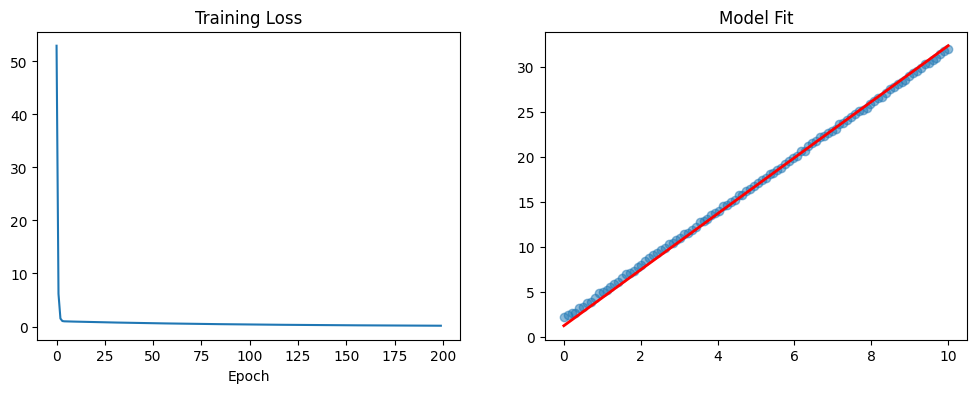

In [9]:
y_pred_final = model(X)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")

plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred_final.detach(), "r-", linewidth=2)
plt.title("Model Fit")
plt.show()